### What Are Embeddings?
Think of embeddings as a way to translate words into a language that computers understand - numbers!

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Simplified 2D example (real embeddings have hundreds of dimensions)
word_embeddings = {
    "cat": [0.8, 0.6],
    "kitten": [0.75, 0.65],
    "dog": [0.7, 0.3],
    "puppy": [0.65, 0.35],
    "car": [-0.5, 0.2],
    "truck": [-0.45, 0.15]
}

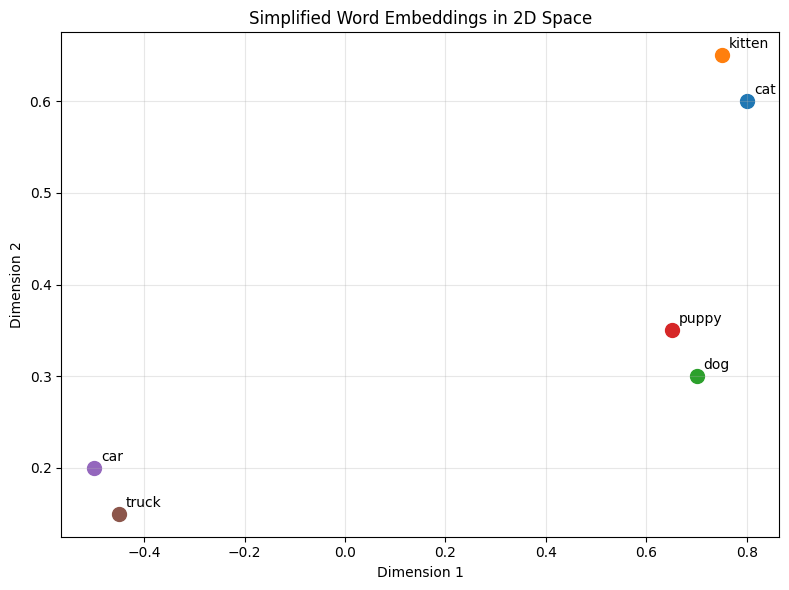

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), xytext=(5, 5), 
                textcoords='offset points')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('Simplified Word Embeddings in 2D Space')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Measuring Similarity

In [4]:
def cosine_similarity(vec1, vec2):
    """
    Cosine similarity measures the angle between two vectors.
    - Result close to 1: Very similar
    - Result close to 0: Not related
    - Result close to -1: Opposite meanings
    """

    dot_product=np.dot(vec1,vec2)
    norm_a=np.linalg.norm(vec1)
    norm_b=np.linalg.norm(vec2)
    return dot_product/(norm_a * norm_b)



In [5]:
# Example
cat_vector = [0.8, 0.6, 0.3]
kitten_vector = [0.75, 0.65, 0.35]
car_vector = [-0.5, 0.2, 0.1]

cat_kitten_similarity=cosine_similarity(cat_vector,kitten_vector)
print(cat_kitten_similarity)

0.9966186334192181


In [6]:
cosine_similarity(cat_vector,car_vector)

np.float64(-0.43718588548916804)

### Creating Your First Embeddings

In [7]:
### Huggingface And OpenAI Models

from langchain_huggingface import HuggingFaceEmbeddings

## Initialize a simple Embedding model(no API Key needed!)
embeddings=HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)
embeddings




/Users/sivavenu/Desktop/AI_projects/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [8]:
## create your first embeddings
text="Hello, I am learning about embeddings!"

embedding=embeddings.embed_query(text)
print(f"Text: {text}")
print(f"Embedding length : {len(embedding)}")
print(embedding)


Text: Hello, I am learning about embeddings!
Embedding length : 384
[-0.018163250759243965, -0.09955167770385742, 0.01381609309464693, -0.008125956170260906, 0.014152204617857933, 0.06406485289335251, -0.006253398489207029, -0.0030178790912032127, 0.025287244468927383, -0.020198650658130646, 0.02432974800467491, 0.07435061037540436, 0.051177144050598145, 0.022038450464606285, -0.05830622464418411, 0.015268261544406414, 0.0235843975096941, 0.09455402940511703, -0.06508850306272507, 0.013296687975525856, -0.020497571676969528, -0.05690854415297508, 0.030303293839097023, -0.08365616947412491, 0.02659638598561287, -0.015231468714773655, -0.043615419417619705, 0.053983964025974274, 0.09025716036558151, -0.08893883228302002, 0.03964458778500557, -0.008835033513605595, -0.030343718826770782, 0.07425563782453537, -0.0540991872549057, 0.11108002066612244, 0.03689988702535629, -0.008959773927927017, -0.06140243262052536, -0.003143352223560214, 0.02195819467306137, 0.042208194732666016, -0.028937

In [9]:
sentences = [
    "The cat sat on the mat",
    "The cat sat on the mat",
    "The dog played in the yard",
    "I love programming in Python",
    "Python is my favorite programming language"
]

embedding_sentence=embeddings.embed_documents(sentences)

print(embedding_sentence[0])
print(embedding_sentence[1])

[0.1304018348455429, -0.01187019981443882, -0.0281169842928648, 0.05123862624168396, -0.055974483489990234, 0.030191568657755852, 0.03016134351491928, 0.02469833940267563, -0.018370522186160088, 0.058766838163137436, -0.024953166022896767, 0.06015421450138092, 0.03983162343502045, 0.03323054686188698, -0.06131138280034065, -0.04937310144305229, -0.05486350506544113, -0.04007607325911522, 0.05642915144562721, 0.039156585931777954, -0.03473707661032677, -0.013247727416455746, 0.031966205686330795, -0.06349917501211166, -0.06017856299877167, 0.07823451608419418, -0.028303883969783783, -0.04744280129671097, 0.04035935550928116, -0.006630904506891966, -0.06674095243215561, -0.004191333893686533, -0.025311682373285294, 0.053341642022132874, 0.017428042367100716, -0.0979236364364624, 0.00606128852814436, -0.06524162739515305, 0.045572564005851746, 0.023641865700483322, 0.07658480852842331, -0.01026434451341629, -0.004076787270605564, -0.06232285127043724, 0.033705174922943115, 0.0186611041426

In [10]:
from langchain_huggingface import HuggingFaceEmbeddings
import time

# Popular models comparison
models = {
    "all-MiniLM-L6-v2": {
        "size": 384,
        "description": "Fast and efficient, good quality",
        "use_case": "General purpose, real-time applications"
    },
    "all-mpnet-base-v2": {
        "size": 768,
        "description": "Best quality, slower than MiniLM",
        "use_case": "When quality matters more than speed"
    },
    "all-MiniLM-L12-v2": {
        "size": 384,
        "description": "Slightly better than L6, bit slower",
        "use_case": "Good balance of speed and quality"
    },
    "multi-qa-MiniLM-L6-cos-v1": {
        "size": 384,
        "description": "Optimized for question-answering",
        "use_case": "Q&A systems, semantic search"
    },
    "paraphrase-multilingual-MiniLM-L12-v2": {
        "size": 384,
        "description": "Supports 50+ languages",
        "use_case": "Multilingual applications"
    }
}

print("📊 Popular Open Source Embedding Models:\n")
for model_name, info in models.items():
    print(f"Model: sentence-transformers/{model_name}")
    print(f"  📏 Embedding size: {info['size']} dimensions")
    print(f"  📝 Description: {info['description']}")
    print(f"  🎯 Use case: {info['use_case']}\n")


📊 Popular Open Source Embedding Models:

Model: sentence-transformers/all-MiniLM-L6-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Fast and efficient, good quality
  🎯 Use case: General purpose, real-time applications

Model: sentence-transformers/all-mpnet-base-v2
  📏 Embedding size: 768 dimensions
  📝 Description: Best quality, slower than MiniLM
  🎯 Use case: When quality matters more than speed

Model: sentence-transformers/all-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Slightly better than L6, bit slower
  🎯 Use case: Good balance of speed and quality

Model: sentence-transformers/multi-qa-MiniLM-L6-cos-v1
  📏 Embedding size: 384 dimensions
  📝 Description: Optimized for question-answering
  🎯 Use case: Q&A systems, semantic search

Model: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Supports 50+ languages
  🎯 Use case: Multilingual applications

